In [2]:
# Step 1: Install the necessary libraries

!pip install -q transformers gradio


# Step 2: Import libraries

from transformers import pipeline

import gradio as gr


# Step 3: Load the sentiment analysis pipeline

# This downloads a pre-trained modelautomatically

classifier =pipeline("sentiment-analysis")

# Step 4: Define a simple function for the app to use

def analyze_text(text):

    result = classifier(text)[0]

    return f"Label:{result['label']}, Score: {round(result['score'], 4)}"

# Step 5: Create the web interface

demo = gr.Interface(

    fn=analyze_text,

    inputs="text",

    outputs="text",

    title="My First AI Sentiment App",
    description="Type a sentence below to see if it's Positive or Negative!"

)

# Step 6: Launch the app

demo.launch(share=True)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e4c6cbef91d3341121.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [4]:
# --- STEP 1: INSTALL LIBRARIES ---
# We install fastai for the AI logic and duckduckgo_search to find images automatically
!pip install -Uqq fastai duckduckgo_search

# --- STEP 2: IMPORT & SETUP SEARCH ---
from fastai.vision.all import *
from duckduckgo_search import DDGS
import time

def search_images(term, max_images=30):
    print(f"Searching for '{term}'...")
    with DDGS() as ddgs:
        # Search for images and get the URLs
        results = ddgs.images(keywords=term, max_results=max_images)
        # Return a list of just the image URLs
        return L([r['image'] for r in results])

# --- STEP 3: DOWNLOAD IMAGES ---
# Define our categories and the folder name
searches = 'forest', 'bird'
path = Path('bird_or_not')

# Loop through each category to download images
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)

    # improved download logic with error handling
    try:
        download_images(dest, urls=search_images(f'{o} photo'))
        # Resize images immediately to save space and standardise them
        resize_images(path/o, max_size=400, dest=path/o)
    except Exception as e:
        print(f"Error downloading {o}: {e}")

    # Pause for 5 seconds to avoid getting blocked by the search engine
    time.sleep(5)

# Clean up any bad images that didn't download correctly
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
print(f"Removed {len(failed)} failed images.")

# --- STEP 4: TRAIN THE MODEL ---
# Define how the data should be loaded
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

print("Training the model... this may take a minute.")

# Load the Pre-trained ResNet18 model
learn = vision_learner(dls, resnet18, metrics=error_rate)

# Train (Fine-tune) the model
from fastai.callback.progress import no_bar
with no_bar():
    learn.fine_tune(3)

# --- STEP 5: PREDICT (TESTING) ---
# We'll download a new, unseen image to test the model
urls = search_images('bird photo', max_images=1)
if len(urls) > 0:
    from fastai.vision.utils import download_url
    dest = 'test_image.jpg'
    download_url(urls[0], dest, show_progress=False)

    # Ask the model what it thinks this image is
    is_bird,_,probs = learn.predict(PILImage.create('test_image.jpg'))

    print(f"\n--- RESULTS ---")
    print(f"This image is a: {is_bird}.")
    print(f"Probability it's a bird: {probs[0]:.4f}")
else:
    print("Could not find a test image.")

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replac

Searching for 'forest photo'...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Error downloading forest: https://duckduckgo.com/i.js?o=json&q=forest+photo&l=us-en&vqd=4-207885899616415229177508414031941142167&p=1&f=%2C%2C%2C%2C%2C 403 Ratelimit


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Searching for 'bird photo'...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Error downloading bird: https://duckduckgo.com/i.js?o=json&q=bird+photo&l=us-en&vqd=4-274667179332920464326936022493141787839&p=1&f=%2C%2C%2C%2C%2C 403 Ratelimit


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Removed 0 failed images.
Training the model... this may take a minute.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

TypeError: 'NoneType' object is not callable

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [5]:
# --- STEP 1: INSTALL LIBRARIES ---
# We install fastai for the AI logic and duckduckgo_search to find images automatically
# !pip install -Uqq fastai duckduckgo_search

# --- STEP 2: IMPORT & SETUP SEARCH ---
from fastai.vision.all import *
from duckduckgo_search import DDGS
import time

def search_images(term, max_images=30):
    print(f"Searching for '{term}'...")
    with DDGS() as ddgs:
        # Search for images and get the URLs
        results = ddgs.images(keywords=term, max_results=max_images)
        # Return a list of just the image URLs
        return L([r['image'] for r in results])

# --- STEP 3: DOWNLOAD IMAGES ---
# Define our categories and the folder name
searches = 'forest', 'bird'
path = Path('bird_or_not')

# Loop through each category to download images
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)

    # improved download logic with error handling
    try:
        download_images(dest, urls=search_images(f'{o} photo'))
        # Resize images immediately to save space and standardise them
        resize_images(path/o, max_size=400, dest=path/o)
    except Exception as e:
        print(f"Error downloading {o}: {e}")

    # Pause for 5 seconds to avoid getting blocked by the search engine
    time.sleep(5)

# Clean up any bad images that didn't download correctly
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
print(f"Removed {len(failed)} failed images.")

# --- STEP 4: TRAIN THE MODEL ---
# Define how the data should be loaded
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

print("Training the model... this may take a minute.")

# Load the Pre-trained ResNet18 model
learn = vision_learner(dls, resnet18, metrics=error_rate)

# Train (Fine-tune) the model
from fastai.callback.progress import no_bar
with no_bar():
    learn.fine_tune(3)

# --- STEP 5: PREDICT (TESTING) ---
# We'll download a new, unseen image to test the model
urls = search_images('bird photo', max_images=1)
if len(urls) > 0:
    from fastai.vision.utils import download_url
    dest = 'test_image.jpg'
    download_url(urls[0], dest, show_progress=False)

    # Ask the model what it thinks this image is
    is_bird,_,probs = learn.predict(PILImage.create('test_image.jpg'))

    print(f"\n--- RESULTS ---")
    print(f"This image is a: {is_bird}.")
    print(f"Probability it's a bird: {probs[0]:.4f}")
else:
    print("Could not find a test image.")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Searching for 'forest photo'...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Error downloading forest: https://duckduckgo.com/i.js?o=json&q=forest+photo&l=us-en&vqd=4-207885899616415229177508414031941142167&p=1&f=%2C%2C%2C%2C%2C 403 Ratelimit


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Searching for 'bird photo'...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Error downloading bird: https://duckduckgo.com/i.js?o=json&q=bird+photo&l=us-en&vqd=4-274667179332920464326936022493141787839&p=1&f=%2C%2C%2C%2C%2C 403 Ratelimit


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Removed 0 failed images.
Training the model... this may take a minute.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

TypeError: 'NoneType' object is not callable

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [1]:
!pip install gensim scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 68.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Tokenized Corpus: [['natural', 'language', 'processing', 'is', 'a', 'fascinating', 'field'], ['word', 'embeddings', 'capture', 'semantic', 'meanings'], ['nlp', 'is', 'used', 'in', 'chatbots', 'and', 'virtual', 'assistants'], ['word2vec', 'is', 'a', 'powerful', 'tool', 'for', 'creating', 'word', 'embeddings']]
Selected Words: ['is', 'embeddings', 'word', 'a', 'creating', 'for', 'tool', 'powerful', 'word2vec', 'assistants']


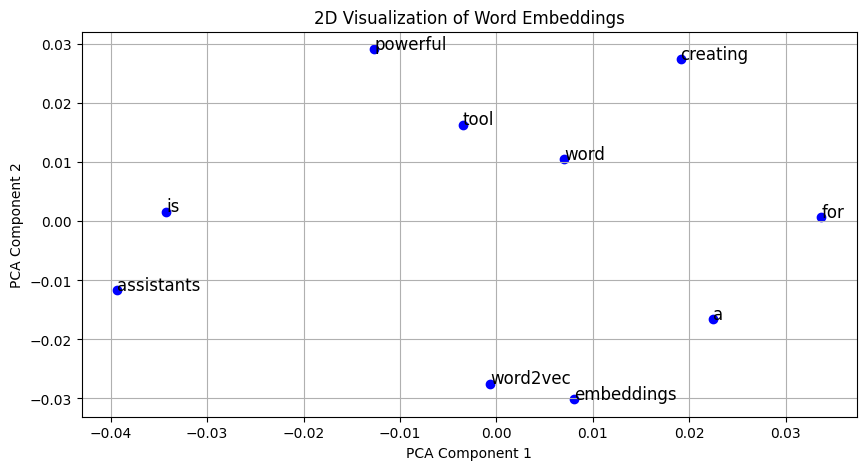

In [2]:
import nltk
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# --- 1. Data Preparation ---

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('punkt_tab')

# Sample corpus of text
corpus = [
    "Natural language processing is a fascinating field",
    "Word embeddings capture semantic meanings",
    "NLP is used in chatbots and virtual assistants",
    "Word2Vec is a powerful tool for creating word embeddings"
]

# Tokenize sentences (convert sentences into lists of lowercase words)
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]
print("Tokenized Corpus:", tokenized_corpus)

# --- 2. Model Training ---

# Train Word2Vec model
# vector_size=100: Dimensionality of the word vectors
# window=5: Maximum distance between the current and predicted word within a sentence
# min_count=1: Ignores all words with total frequency lower than this
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Save and load the model (optional demonstration of persistence)
model.save("word2vec.model")
model = Word2Vec.load("word2vec.model")

# --- 3. Extract Vectors ---

# Get the list of all unique words in the vocabulary
# We select the first 10 words for visualization to keep the plot clean
words = list(model.wv.index_to_key)[:10]
print("Selected Words:", words)

# Retrieve the vector representation for each selected word
word_vectors = [model.wv[word] for word in words]

# --- 4. Visualization (PCA) ---


# Apply PCA to reduce vectors from 100 dimensions to 2 dimensions for plotting
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Create the plot
plt.figure(figsize=(10, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1], color='blue')

# Annotate the points with the actual words
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]), fontsize=12)

# Add titles and labels
plt.title("2D Visualization of Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

In [3]:
# Block 1: Setup and Search Logic
!pip install -Uqq fastai duckduckgo_search

from fastai.vision.all import *
from duckduckgo_search import DDGS
import time

def search_images(term, max_images=30):
    print(f"Searching for '{term}'...")
    # Add a delay before searching to prevent rate limiting
    time.sleep(2)
    with DDGS() as ddgs:
        results = ddgs.images(keywords=term, max_results=max_images)
        return L(results).itemgot('image')

# Define path for data
path = Path('bird_or_not')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 82.4 MB/s eta 0:00:00


In [4]:
import time

searches = 'forest','bird'
path = Path('bird_or_not')

if not path.exists():
    path.mkdir()
    for o in searches:
        dest = (path/o)
        dest.mkdir(exist_ok=True, parents=True)

        print(f"Downloading images for: {o}")
        try:
            # search_images now fetches URLs
            urls = search_images(f'{o} photo', max_images=10)
            download_images(dest, urls=urls)

            # CRITICAL: Pause for 5-10 seconds to avoid being blocked
            print("Pausing to respect rate limits...")
            time.sleep(10)

        except Exception as e:
            print(f"Error downloading {o}: {e}")
            print("Trying to continue to next category...")

    # Resize and clean up the images we did manage to get
    resize_images(path/o, max_size=400, dest=path/o)

print("Block 2 execution complete.")

Searching for 'forest photo'...


/tmp/ipython-input-550925546.py:12: RuntimeWarning: This package (`duckduckgo_search`) has been renamed to `ddgs`! Use `pip install ddgs` instead.
  with DDGS() as ddgs:
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timez

Pausing to respect rate limits...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Searching for 'bird photo'...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Error downloading bird: https://duckduckgo.com/i.js?o=json&q=bird+photo&l=us-en&vqd=4-274667179332920464326936022493141787839&p=1&f=%2C%2C%2C%2C%2C 403 Ratelimit
Trying to continue to next category...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Block 2 execution complete.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=5005) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a futur

Cleaning up images...


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Removed 0 broken images. Total images remaining: 10
DataLoaders created successfully!


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
  0%|          | 0.00/44.7M [00:00<?, ?B/s]/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo

Starting fine-tuning...
Error during training setup: Exception occured in `ProgressCallback` when calling event `before_fit`:
	'NBMasterBar' object has no attribute 'out'
Check if your 'bird_or_not' folder has 'bird' and 'forest' subfolders with images.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

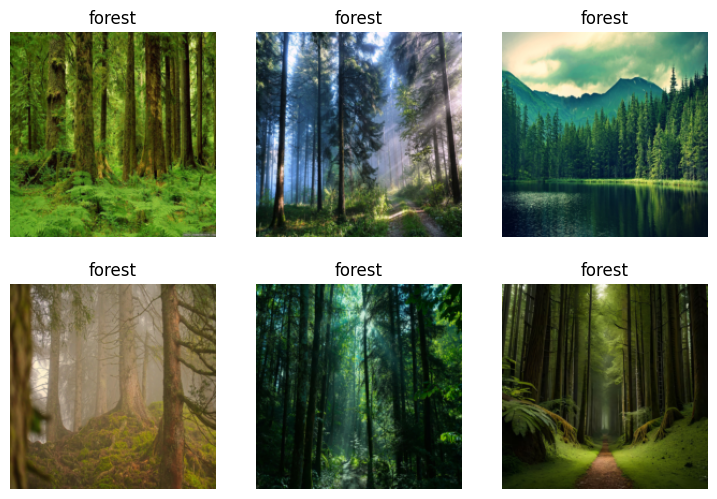

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [5]:
# --- Block 3: Data Loading and Training ---

# 1. Clean up any broken downloads first
print("Cleaning up images...")
files = get_image_files(path)
failed = verify_images(files)
failed.map(Path.unlink)
print(f"Removed {len(failed)} broken images. Total images remaining: {len(get_image_files(path))}")

# 2. Define the DataBlock
# This is the 'blueprint' for how fastai handles your data
birds = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
)

# 3. Create DataLoaders
# If this fails, it means your folders are empty or named incorrectly
try:
    dls = birds.dataloaders(path, bs=8)
    print("DataLoaders created successfully!")

    # Show a few examples to be sure
    dls.show_batch(max_n=6)

    # 4. Train the model
    learn = vision_learner(dls, resnet18, metrics=error_rate)
    print("Starting fine-tuning...")
    learn.fine_tune(3)

except Exception as e:
    print(f"Error during training setup: {e}")
    print("Check if your 'bird_or_not' folder has 'bird' and 'forest' subfolders with images.")